In [1]:
import numpy as np
from src.utils import *
from matplotlib import pyplot as plt

In [17]:
imgdims = (800, 800, 3)
patchdims = (32, 32, 3)
outputdims = (200, 200, 1)
pad = 0

In [25]:
img = load_data("data/flowers/Images/1.jpg", dims=imgdims, normalize=True)

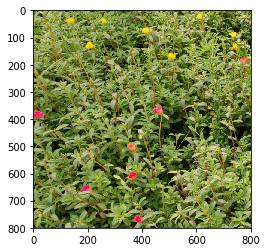

In [26]:
plt.imshow(img)

In [29]:
dimg = load_dotlabel("data/flowers/image1/1.jpg", imgdims=imgdims)

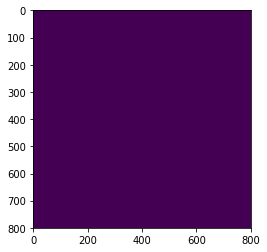

In [30]:
plt.imshow(dimg)

In [31]:
out = sample_exemplar(inputs=(img,dimg), patchdims=patchdims, augment=True)

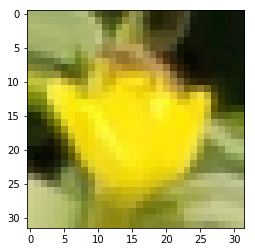

In [32]:
plt.imshow(out[0])

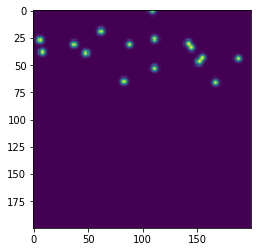

In [24]:
plt.imshow(out[1])

In [33]:
import xml.etree.ElementTree as ET

In [280]:
root = ET.parse('data/flowers/Markers/CellCounter_6.xml').getroot()

In [281]:
file_name = root.find('Image_Properties/Image_Filename').text

In [283]:
file_name

'6.jpg'

In [219]:
for type_tag in root.findall('Marker_Data/Marker_Type'):
    value = type_tag.find('Type').text
    if not ( value is "1" or value is "2"):
        continue
    
    label_img = np.zeros((1585, 1585, 3))
    
    for marker in type_tag.findall('Marker'):
        x = int(marker.find('MarkerX').text)
        y = int(marker.find('MarkerY').text)
        label_img[y][x][:]= [1,1,1] 
    
    plt.imsave("data/flowers/image" + str(value) + "/" + "sup.jpg", label_img, format="jpg")

In [221]:
img = plt.imread("data/flowers/image2/sup.jpg")

In [15]:
images_dir = "data/flowers/Images/"
annotations_dir = "data/flowers/Markers/"

In [16]:
import os

In [56]:
annotations_list = os.listdir(annotations_dir)

In [57]:
annotations_list

['CellCounter_19.xml',
 'CellCounter_13.xml',
 'CellCounter_4.xml',
 'CellCounter_7.xml',
 'CellCounter_10.xml',
 'CellCounter_1.xml',
 'CellCounter_2.xml',
 'CellCounter_17.xml',
 'CellCounter_16.xml',
 'CellCounter_9.xml',
 'CellCounter_6.xml',
 'CellCounter_14.xml',
 'CellCounter_12.xml',
 'CellCounter_3.xml',
 'CellCounter_8.xml',
 'CellCounter_18.xml',
 'CellCounter_20.xml',
 'CellCounter_11.xml',
 'CellCounter_15.xml']

In [21]:
for annotations_name in annotations_list:
    anno(os.path.join(annotations_dir, annotations_name), images_dir)

In [22]:
def anno(annotation_path, image_dir, save_path="data/flowers/"):
    
    # parse the xml
    root = ET.parse(annotation_path).getroot()
    
    # get corresponding image filename and path
    img_filename = root.find('Image_Properties/Image_Filename').text
    img_path = os.path.join(image_dir, img_filename)
    
    
    for type_tag in root.findall('Marker_Data/Marker_Type'):
        
        # go through all the types of marker present in the xml
        value = type_tag.find('Type').text
        
        # we only consider maker 1 and 2
        if not ( value is "1" or value is "2"):
            continue

        label_img = np.zeros(plt.imread(img_path).shape)

        for marker in type_tag.findall('Marker'):
            x = int(marker.find('MarkerX').text)
            y = int(marker.find('MarkerY').text)
            label_img[y][x][:]= [1,1,1] 
        
        plt.imsave(os.path.join(save_path, ("image" + str(value)), img_filename), label_img, format="jpg")

In [96]:
data = {}
data['trn_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(1,15) if i is not 5]
data['trn_lb'] =  [os.path.join("image2/", str(i)+".jpg") for i in range(1,15) if i is not 5]
data['val_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(15,21) if i is not 5]
data['val_lb'] = [os.path.join("image2/", str(i)+".jpg") for i in range(15,21) if i is not 5]
np.savez("meta/flowers2", **data)
data = {}
data['val_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(15,21) if i is not 5]
data['val_lb'] = [os.path.join("image1/", str(i)+".jpg") for i in range(15,21) if i is not 5]
data['trn_lst'] = [os.path.join("Images/", str(i)+".jpg") for i in range(1,15) if i is not 5]
data['trn_lb'] =  [os.path.join("image1/", str(i)+".jpg") for i in range(1,15) if i is not 5]
np.savez("meta/flowers1", **data)